# Chapter 12
## Question 3
## In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

\begin{array}{|c|c|c|}
\hline
\text{Obs.} & X_1 & X_2 \\
\hline
1 & 1 & 4 \\
2 & 1 & 3 \\
3 & 0 & 4 \\
4 & 5 & 1 \\
5 & 6 & 2 \\
6 & 4 & 0 \\
\hline
\end{array}


## (a). Plot the observations.

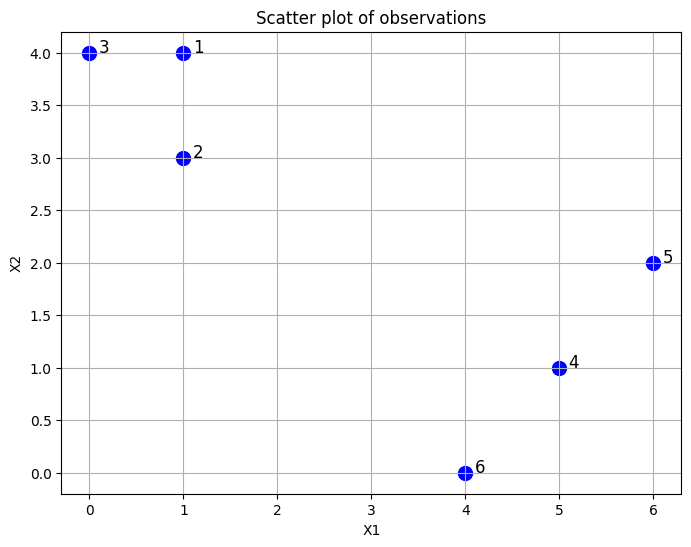

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data for observations
X = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', s=100, label='Observations')
for i, (x, y) in enumerate(X, start=1):
    plt.text(x + 0.1, y, f'{i}', fontsize=12)
plt.title('Scatter plot of observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

## (b). Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [25]:
np.random.seed(42)
initial_clusters = np.random.choice([1, 2], size=6)

for i, label in enumerate(initial_clusters, start=1):
    print(f"Observation {i} is initially assigned to cluster {label}.")

Observation 1 is initially assigned to cluster 1.
Observation 2 is initially assigned to cluster 2.
Observation 3 is initially assigned to cluster 1.
Observation 4 is initially assigned to cluster 1.
Observation 5 is initially assigned to cluster 1.
Observation 6 is initially assigned to cluster 2.


## (c). Compute the centroid for each cluster.

In [26]:
def compute_centroids(X, labels):
    centroids = np.array([X[labels == i].mean(axis=0) for i in np.unique(labels)])
    return centroids

centroids = compute_centroids(X, initial_clusters)
for i, centroid in enumerate(centroids, start=1):
    print(f"The initial centroid for cluster {i}:  {centroid}")

The initial centroid for cluster 1:  [3.   2.75]
The initial centroid for cluster 2:  [2.5 1.5]


## (d). Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [27]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1) + 1

new_clusters = assign_clusters(X, centroids)
for i, label in enumerate(new_clusters, start=1):
    print(f"Observation {i} is assigned to cluster {label}.")

Observation 1 is assigned to cluster 1.
Observation 2 is assigned to cluster 1.
Observation 3 is assigned to cluster 1.
Observation 4 is assigned to cluster 2.
Observation 5 is assigned to cluster 1.
Observation 6 is assigned to cluster 2.


## (e). Repeat (c) and (d) until the answers obtained stop changing.

In [28]:
while not np.array_equal(initial_clusters, new_clusters):
    initial_clusters = new_clusters
    centroids = compute_centroids(X, new_clusters)
    new_clusters = assign_clusters(X, centroids)

print("\nFinal cluster labels:")
for i, label in enumerate(new_clusters, start=1):
    print(f"Observation {i}: cluster {label}")

print("\nFinal centroids:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Cluster {i}:  {centroid}")


Final cluster labels:
Observation 1: cluster 1
Observation 2: cluster 1
Observation 3: cluster 1
Observation 4: cluster 2
Observation 5: cluster 2
Observation 6: cluster 2

Final centroids:
Cluster 1:  [0.66666667 3.66666667]
Cluster 2:  [5. 1.]


## (f). In your plot from (a), color the observations according to the cluster labels obtained.

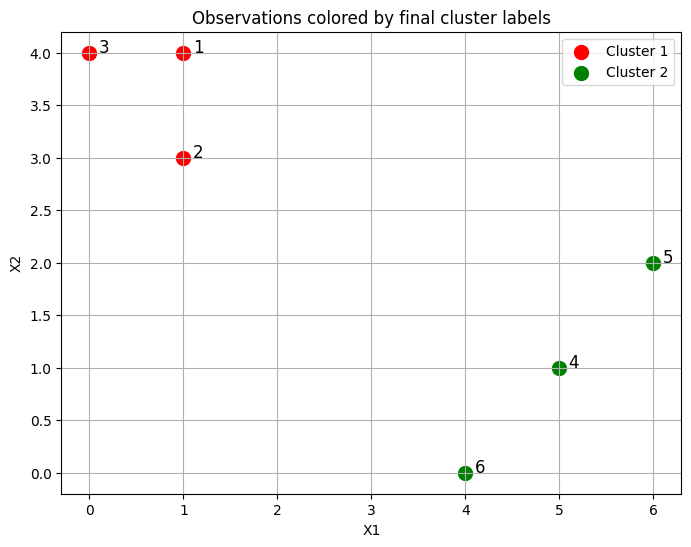

In [29]:
plt.figure(figsize=(8, 6))
for i, color in zip(range(2), ['red', 'green']):
    plt.scatter(X[new_clusters == i+1, 0], X[new_clusters == i+1, 1], color=color, s=100, label=f'Cluster {i+1}')
for i, (x, y) in enumerate(X, start=1):
    plt.text(x + 0.1, y, f'{i}', fontsize=12)
plt.title('Observations colored by final cluster labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()